# EECS3401 AI Final Project

# Authors: Cheng Tian Cui, Peidong He, Joosun Hwang

**Wagner,Dennis, Heider,D., and Hattab,Georges. (2023). Secondary Mushroom Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5FP5Q.**

**Inspired by the Mushroom Data Set of J. Schlimmer: url:https://archive.ics.uci.edu/ml/datasets/Mushroom.**

Import necessary libraries

In [ ]:
# Import libraries

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# 1- Load the dataset

In [ ]:
from google.colab import drive


# Mount Google Drive
drive.mount('/content/gdrive')


# Construct the file path in Colab
# file_path = '/content/gdrive/My Drive/secondary_data.csv'
file_path = '/content/gdrive/My Drive/AI-final-project/secondary_data.csv' # Peidong's path


# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';')


#putting all the attributes into X excpet 'class'
X = df.drop('class', axis=1)

#setting Y as a target variable
y = df['class']







Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Take a quick look at the data structure

In [ ]:
#checking for any missing value

missing_values = X.isnull().sum()
print(missing_values)

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64


In [ ]:
#checking if the attributes has data more than 50% of total attributes, if its less delete the attributes.
# Calculate the threshold (50% of total rows)
threshold = len(df) * 0.5

# Drop columns with more than 50% missing values
columns_to_drop = []
for column in df.columns:
  missing_values = df[column].isnull().sum()
  if missing_values > threshold:
    columns_to_drop.append(column)

print(columns_to_drop) #gill-spacing is not removed
X.drop(columns=columns_to_drop, inplace=True)




['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']


In [ ]:

#checking the updated data frame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  object 
 11  has-ring              61069 non-null  object 
 12  ring-type             58598 non-null  object 
 13  habitat               61069 non-null  object 
 14  season                61069 non-null  object 
dtypes: float64(3), obje

In [ ]:
# If columns have more than half of the rows as null then the entire column can be dropped
missing_values_threshold = len(X) * 0.5
print(missing_values_threshold) # half of the rows

# Get the columns with missing values exceeding the threshold
columns_to_remove = X.columns[X.isnull().sum() > missing_values_threshold]
# print(columns_to_remove)

# Remove the columns
X.drop(columns=columns_to_remove, inplace=True)

# X.dropna(subset=columns_with_missing_values, inplace=True)

30534.5


Use .head() to see first 5 rows of features

In [ ]:
# First 5 rows of features
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,w,t,g,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,w,t,g,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,w,t,g,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,w,t,p,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,w,t,p,d,w


Use .info() method to see a concise summary of a DataFrame.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  object 
 2   cap-surface           46949 non-null  object 
 3   cap-color             61069 non-null  object 
 4   does-bruise-or-bleed  61069 non-null  object 
 5   gill-attachment       51185 non-null  object 
 6   gill-spacing          36006 non-null  object 
 7   gill-color            61069 non-null  object 
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-color            61069 non-null  object 
 11  has-ring              61069 non-null  object 
 12  ring-type             58598 non-null  object 
 13  habitat               61069 non-null  object 
 14  season                61069 non-null  object 
dtypes: float64(3), obje

Use .describe() method to see a summary of the numerical attributes.

In [ ]:
X.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [ ]:
X.shape

(61069, 15)

## 2.1 Three common plots used for Exploratory Data Analysis

1. Histrogram
- to visualize the distribution of a single numerical variable
2. Pie Chart:
- to illustrate the proportion of each category.
- Mushroom Availability by Season
3. Bar Chart:
- excellent for visualizing the frequency or count of different categories within your data.
- Edibility of Mushrooms by Cap Color

## 2.1.1 Histrogram

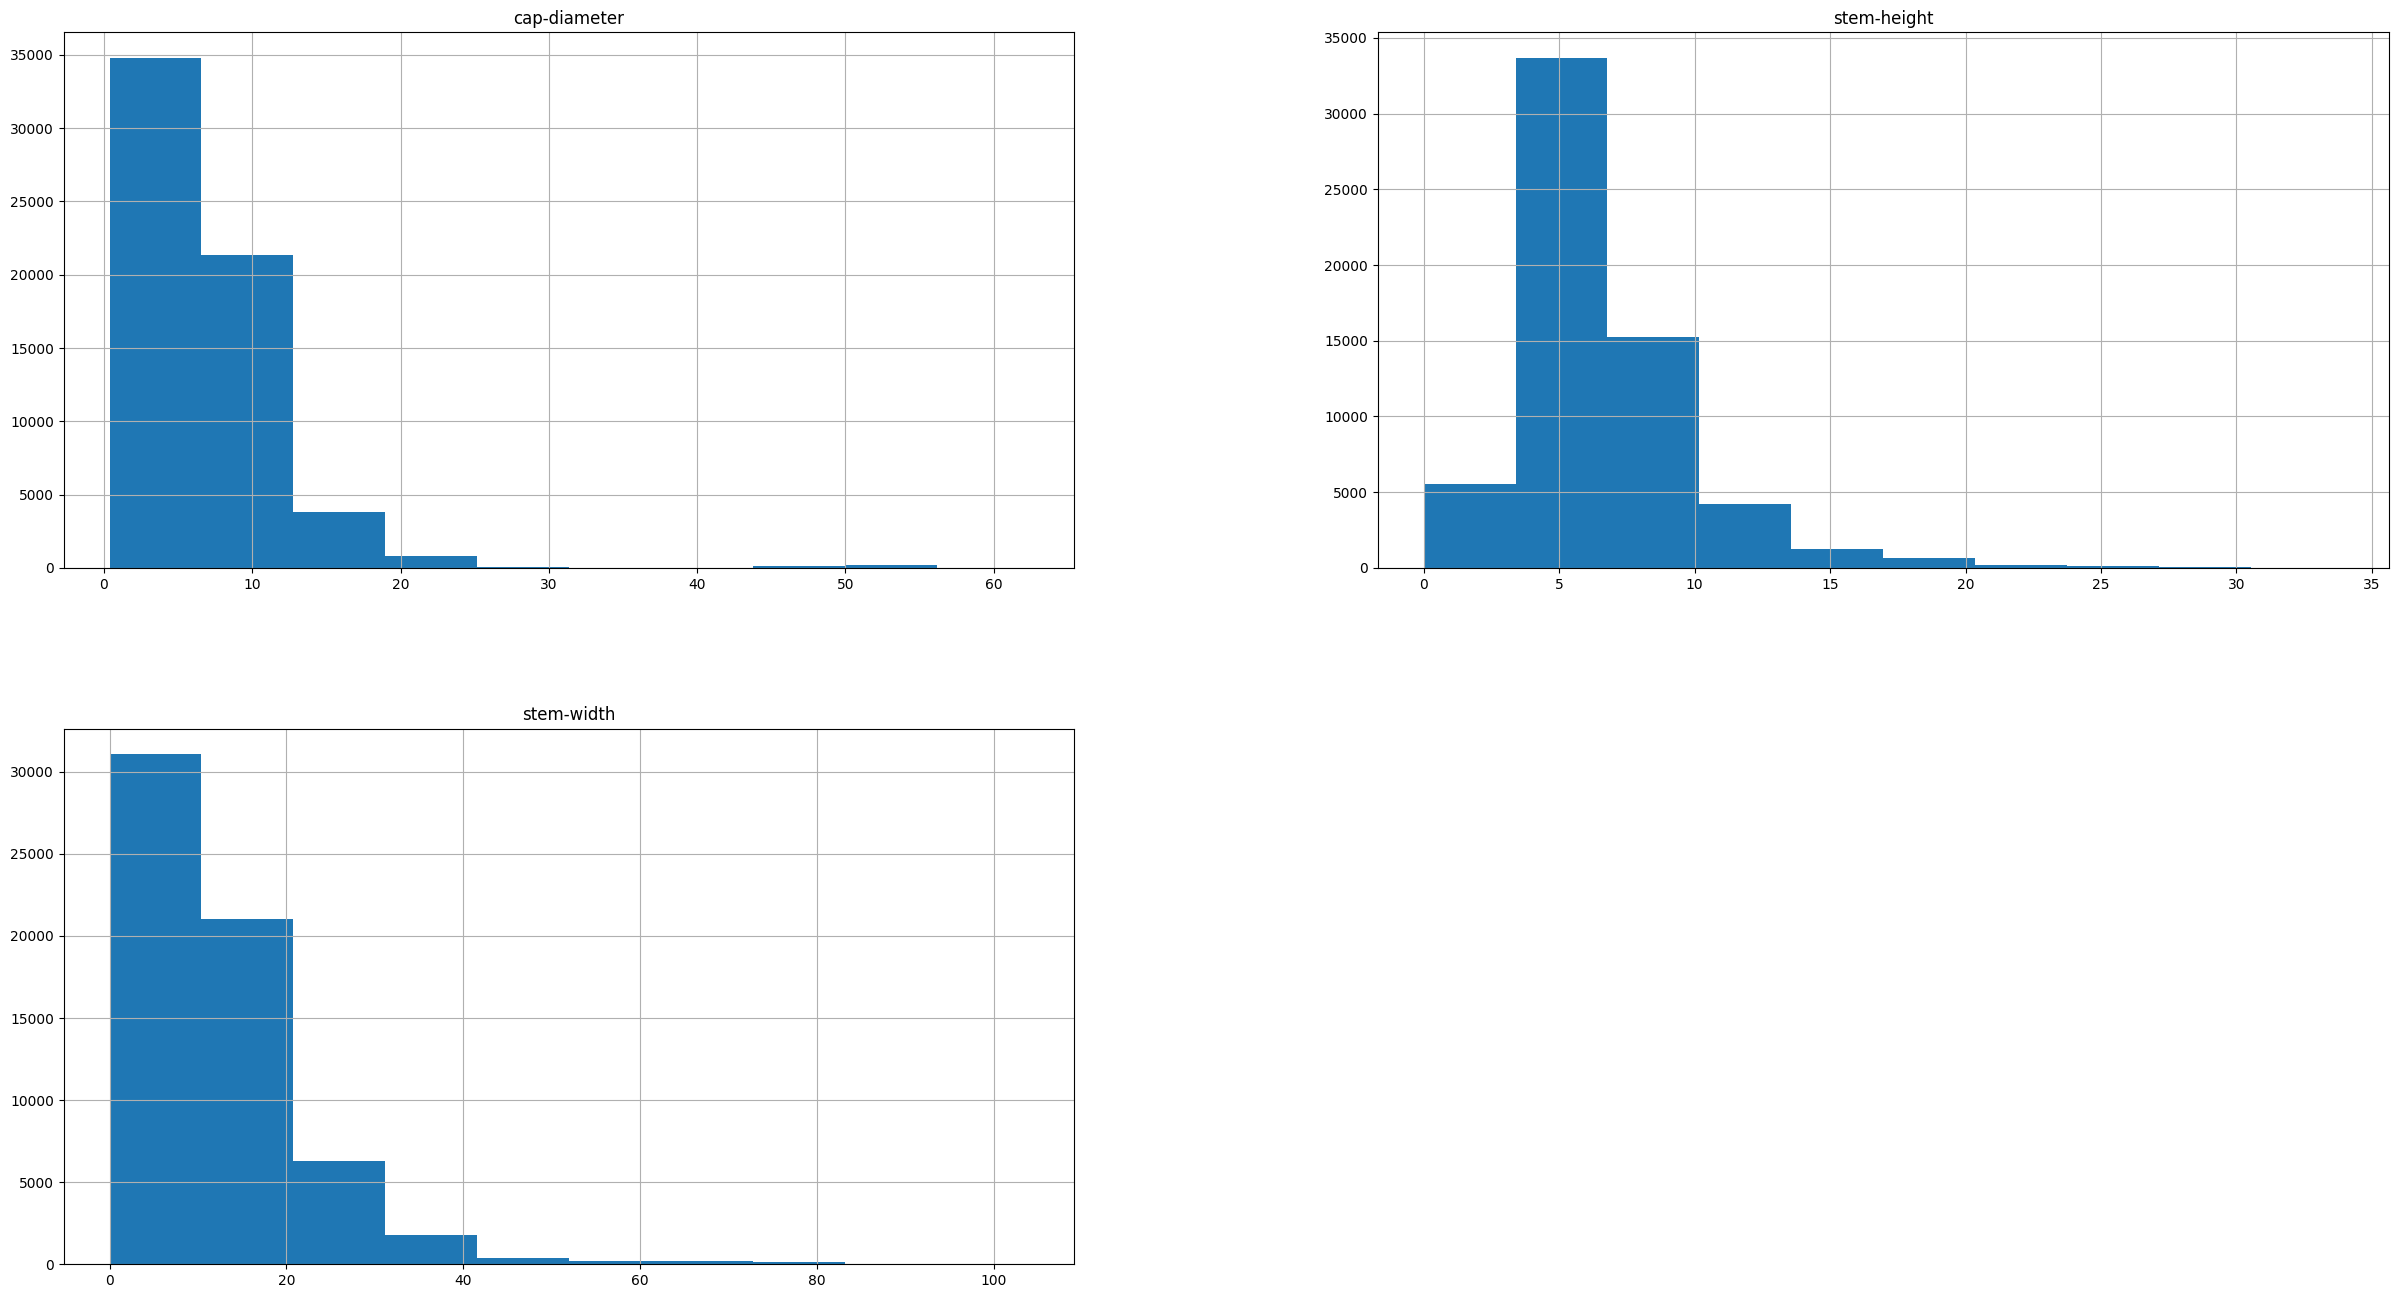

In [ ]:
X.hist(figsize=(30,16))
plt.show()

## 2.1.2 Pie Chart

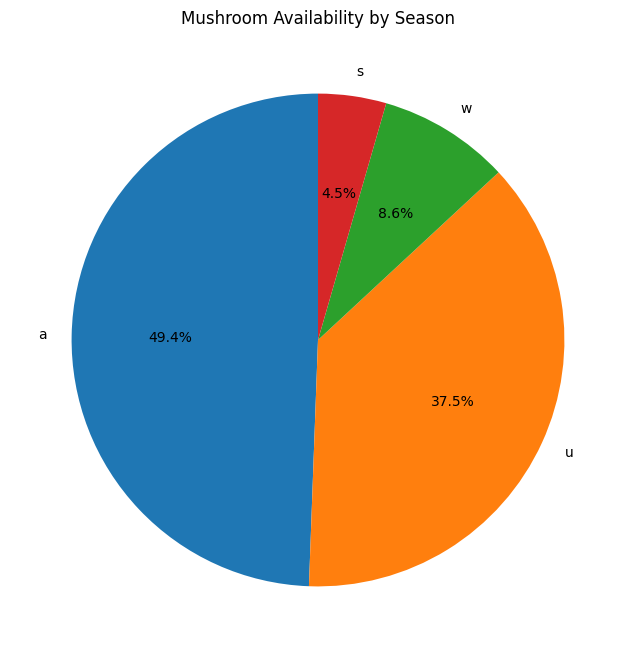

In [ ]:
# Count the occurrences of each season
season_counts = df['season'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Mushroom Availability by Season')
plt.show()

## 2.1.3 Bar Chart

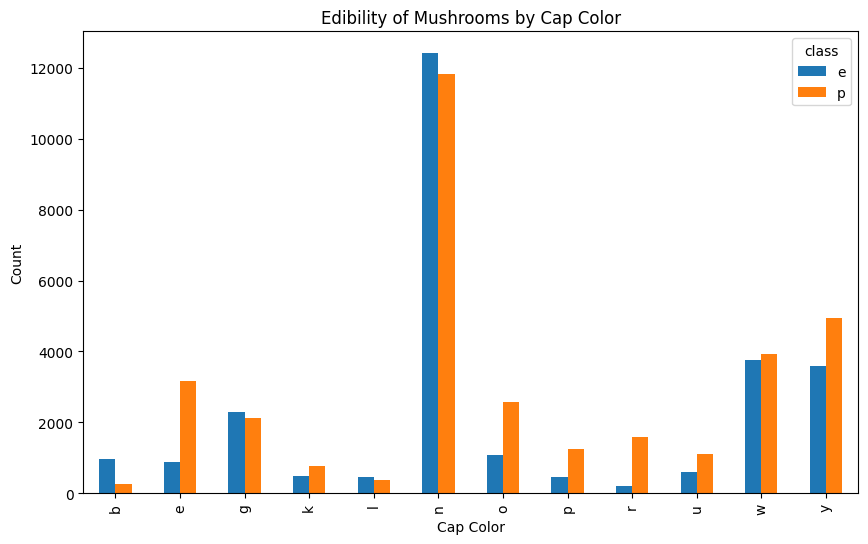

In [ ]:
# Create a Bar chart of 'class' and 'cap-color'
ct = pd.crosstab(df['cap-color'], df['class'])

# Plot the bar chart
ct.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Edibility of Mushrooms by Cap Color')
plt.xlabel('Cap Color')
plt.ylabel('Count')
plt.show()

# 3. Data Preprocessing Pipline
- Handle Missing Values
- Feature Engineering
- Scale or Normalize Data
- Encode Categorical Variables
- Split the Data into Training and Test Sets



Import necessary libraries for pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler



1. Column Categorization and handle missing values with SimpleImputer
2. Identify whether a numerical column should be considered as categorical based on the number of unique values

In [ ]:
# Create the cat and num columns
# Get a list of column names from the 'X' DataFrame that are of numerical data types.
# Get a list of column names from the 'X' DataFrame that are not of numerical data types.

num_cols = X.select_dtypes(include='number').columns.to_list()
cat_cols = X.select_dtypes(exclude='number').columns.to_list()


# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                    remainder='passthrough'
                                 )


Display the pipeline

In [ ]:
num_cols

['cap-diameter', 'stem-height', 'stem-width']

In [ ]:
cat_cols

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [ ]:
# Show the pipeline
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['cap-diameter', 'stem-height', 'stem-width']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['cap-shape', 'cap-surface', 'cap-color',
                                  'does-bruise-or-bleed', 'gill-attachment',
                                  'gill-spacing', 'gill-color', 'stem-color',
                                  'has-ring', 'ring-type', 'habitat',
                                  'season'])])

Apply the preprocessing pipeline on the data set

In [ ]:
# Apply the preprocessing transformations to the features 'X'.
# This includes scaling, encoding categorical variables, imputation, etc.
X_prepared = preprocessing.fit_transform(X)

# add column headers back.
feature_names=preprocessing.get_feature_names_out()

# Create a new DataFrame from the transformed data 'X_prepared'.
# Assign the feature names to the columns of this new DataFrame
X_prepared = pd.DataFrame(data=X_prepared, columns=feature_names)

X_prepared

,num__cap-diameter,num__stem-height,num__stem-width,cat__cap-shape_b,cat__cap-shape_c,cat__cap-shape_f,cat__cap-shape_o,cat__cap-shape_p,cat__cap-shape_s,cat__cap-shape_x,...,cat__habitat_h,cat__habitat_l,cat__habitat_m,cat__habitat_p,cat__habitat_u,cat__habitat_w,cat__season_a,cat__season_s,cat__season_u,cat__season_w
0,1.619462,3.076705,0.492293,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.873982,3.385311,0.601900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.393432,3.328931,0.557061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.412426,2.726555,0.381690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.501699,2.952075,0.503254,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,-1.054903,-0.786809,-0.590822,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61065,-1.037808,-1.009362,-0.669539,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
61066,-1.037808,-0.807581,-0.575875,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
61067,-1.043506,-0.896602,-0.668543,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## 3.1 Split the dataset into 80% training set and 20% test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)
# Check if the dataset is balanced or not (The answer is yes, based on the shape)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(48855, 92) (48855,) (12214, 92) (12214,)


# 4. Model Selection
svm,
random forest tree,
KNN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report


## 4.1 Find out the accuracy of all kinds of classifiers

In [ ]:
# List of all classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN with k=1': KNeighborsClassifier(n_neighbors=1),
    'K-NN with k=3': KNeighborsClassifier(n_neighbors=3),
    'Gaussian Naive Bayes': GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
}

# train each member and see how well they perform.
# However, only using accuracy for performance measure ismisleading
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

for name, clf in classifiers.items():
    # fitting the model to the training data.
    clf.fit(X_train, y_train)

    # predict the test data.
    predictions = clf.predict(X_test)

    # Calculate accuracy for each model
    accuracy = accuracy_score(y_test, predictions)

    print(f"The {name} classification report:")

    # Print the classification report
    print(classification_report(y_test, predictions))

    # Add results to the DataFrame
    results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)

# Test SVM separately to set the threshold for the number of testing samples
# C = 0.1
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_pred = model_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)
# print(f"The accuracy of SVM on the test set is: {svm_accuracy:%}")
# Add results to the DataFrame
results_df = results_df.append({'Classifier': 'SVM', 'Accuracy': svm_accuracy}, ignore_index=True)

results_df

The Decision Tree classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The Neural Network classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The Random Forest classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The K-NN with k=1 classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The K-NN with k=3 classification report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      5374
           p       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The Gaussian Naive Bayes classification report:
              precision    recall  f1-score   support

           e       0.73      0.56      0.63      5374
           p       0.71      0.84      0.77      6840

    accuracy                           0.71     12214
   macro avg       0.72      0.70      0.70     12214
weighted avg       0.72      0.71      0.71     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The AdaBoost classification report:
              precision    recall  f1-score   support

           e       0.77      0.78      0.77      5374
           p       0.82      0.82      0.82      6840

    accuracy                           0.80     12214
   macro avg       0.80      0.80      0.80     12214
weighted avg       0.80      0.80      0.80     12214



<ipython-input-98-ab062c67861a>:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-98-ab062c67861a>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Classifier': 'SVM', 'Accuracy': svm_accuracy}, ignore_index=True)


,Classifier,Accuracy
0,Decision Tree,0.997380
1,Neural Network,1.000000
2,Random Forest,1.000000
3,K-NN with k=1,1.000000
4,K-NN with k=3,1.000000
5,Gaussian Naive Bayes,0.713607
6,AdaBoost,0.800720
7,SVM,0.999099


## 4.2 How well each classifier generalizes to unseen data
- Only AdaBoost and Gaussian naive bayes have a slightly higher error rate than other classifiers
- The best out of all classifiers are Random forest and k-NN

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Set up KFold cross-validation object with 10 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate over each classifier and perform cross-validation
for name, clf in classifiers.items():
    # Calculate cross-validation scores
    scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')

    # Calculate the mean classification error rate, the error rate is the complement of accuracy
    error_rate = 1 - scores.mean()
    print(f"Classification Error Rate for {name}: {error_rate:f}")

# Calculate SVM score with cross validation
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
# Perform cross-validation
scores = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
error_rate_svm = 1 - scores.mean()
print(f"Classification Error Rate for SVM: {error_rate_svm:f}")



Classification Error Rate for Decision Tree: 0.002436
Classification Error Rate for Neural Network: 0.000041
Classification Error Rate for Random Forest: 0.000061
Classification Error Rate for K-NN with k=1: 0.000082
Classification Error Rate for K-NN with k=3: 0.000164
Classification Error Rate for Gaussian Naive Bayes: 0.287811
Classification Error Rate for AdaBoost: 0.199652
Classification Error Rate for SVM: 0.000205


## 4.3 Reduce number of attributes by using Mutual-information score and select the top 7 attibutes with the highest score

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information scores for each feature
mutual_info_scores = mutual_info_classif(X_train, y_train, discrete_features='auto', random_state=42)

# Find the top 7 attributes with the highest scores
top_7_indices = np.argsort(mutual_info_scores)[-7:] # get the indices that would sort it in ascending order
selected_attrs = X_prepared.columns[top_7_indices]
print(selected_attrs)

X_train_low_dim = X_train[selected_attrs]
X_test_low_dim = X_test[selected_attrs]

# We will re-examine the models using reduced dataset
classifiers_reduced = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN with k=1': KNeighborsClassifier(n_neighbors=1),
    'K-NN with k=3': KNeighborsClassifier(n_neighbors=3),
    'Gaussian Naive Bayes': GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
}

# Retrain models using reduced dataset
reduced_results_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

for name, clf in classifiers_reduced.items():
    # fitting the model to the training data.
    clf.fit(X_train_low_dim, y_train)

    # predict the test data.
    predictions = clf.predict(X_test_low_dim)

    # Calculate accuracy for each model
    accuracy = accuracy_score(y_test, predictions)

    print(f"The {name} classification report:")

    # Print the classification report
    print(classification_report(y_test, predictions))

    # Add results to the DataFrame
    reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)

# Test SVM separately to set the threshold for the number of testing samples
# C = 0.1
model_svm_reduced = SVC(kernel='poly', C=0.1, gamma=1)
model_svm_reduced.fit(X_train_low_dim.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_pred_reduced = model_svm_reduced.predict(X_test_low_dim)
svm_reduced_accuracy = accuracy_score(y_test, svm_pred_reduced)
svm_reduced_classification_report = classification_report(y_test, svm_pred_reduced)
# print(f"The accuracy of SVM on the test set is: {svm_accuracy:%}")
# Add results to the DataFrame
reduced_results_df = reduced_results_df.append({'Classifier': 'SVM', 'Accuracy': svm_reduced_accuracy}, ignore_index=True)

reduced_results_df

Index(['cat__cap-shape_b', 'cat__gill-color_w', 'cat__stem-color_w',
       'cat__ring-type_z', 'num__cap-diameter', 'num__stem-height',
       'num__stem-width'],
      dtype='object')
The Decision Tree classification report:
              precision    recall  f1-score   support

           e       0.84      0.84      0.84      5374
           p       0.88      0.87      0.87      6840

    accuracy                           0.86     12214
   macro avg       0.86      0.86      0.86     12214
weighted avg       0.86      0.86      0.86     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The Neural Network classification report:
              precision    recall  f1-score   support

           e       0.87      0.87      0.87      5374
           p       0.90      0.90      0.90      6840

    accuracy                           0.89     12214
   macro avg       0.88      0.88      0.88     12214
weighted avg       0.89      0.89      0.89     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The Random Forest classification report:
              precision    recall  f1-score   support

           e       0.87      0.89      0.88      5374
           p       0.91      0.89      0.90      6840

    accuracy                           0.89     12214
   macro avg       0.89      0.89      0.89     12214
weighted avg       0.89      0.89      0.89     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The K-NN with k=1 classification report:
              precision    recall  f1-score   support

           e       0.85      0.85      0.85      5374
           p       0.88      0.88      0.88      6840

    accuracy                           0.87     12214
   macro avg       0.87      0.87      0.87     12214
weighted avg       0.87      0.87      0.87     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The K-NN with k=3 classification report:
              precision    recall  f1-score   support

           e       0.86      0.87      0.87      5374
           p       0.90      0.89      0.89      6840

    accuracy                           0.88     12214
   macro avg       0.88      0.88      0.88     12214
weighted avg       0.88      0.88      0.88     12214

The Gaussian Naive Bayes classification report:


<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


              precision    recall  f1-score   support

           e       0.46      1.00      0.63      5374
           p       1.00      0.06      0.12      6840

    accuracy                           0.48     12214
   macro avg       0.73      0.53      0.37     12214
weighted avg       0.76      0.48      0.34     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)


The AdaBoost classification report:
              precision    recall  f1-score   support

           e       0.69      0.64      0.66      5374
           p       0.73      0.77      0.75      6840

    accuracy                           0.71     12214
   macro avg       0.71      0.70      0.71     12214
weighted avg       0.71      0.71      0.71     12214



<ipython-input-61-fae583ec39ae>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': name, 'Accuracy': accuracy}, ignore_index=True)
<ipython-input-61-fae583ec39ae>:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reduced_results_df = reduced_results_df.append({'Classifier': 'SVM', 'Accuracy': svm_reduced_accuracy}, ignore_index=True)


,Classifier,Accuracy
0,Decision Tree,0.858605
1,Neural Network,0.886278
2,Random Forest,0.889717
3,K-NN with k=1,0.869494
4,K-NN with k=3,0.881611
5,Gaussian Naive Bayes,0.475438
6,AdaBoost,0.712297
7,SVM,0.731619


In [ ]:
# Iterate over each classifier and perform cross-validation
for name, clf in classifiers_reduced.items():
    # predict the test data.
    predictions_low_dim = clf.predict(X_test_low_dim)

    # Calculate accuracy for each model
    accuracy_low_dim = accuracy_score(y_test, predictions_low_dim)

    # Compare the performance
    print(f"The accuracy of {name} on the test set after reducing attributes is: {accuracy_low_dim:%}")

    # Calculate cross-validation scores using only the top 5 attributes
    scores = cross_val_score(clf, X_train_low_dim, y_train, cv=kf, scoring='accuracy')

    # Calculate and print the mean classification error rate
    error_rate = 1 - scores.mean()
    print(f"Classification Error Rate for {name}: {error_rate:f}")

# Test SVM
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train_low_dim.iloc[:10000], y_train.iloc[:10000].values.ravel())
# Use X_test_low_dim
svm_pred_low_dim = model_svm.predict(X_test_low_dim)
svm_accuracy_low_dim = accuracy_score(y_test, svm_pred_low_dim)
print(f"The accuracy of SVM on the test set after reducing attributes is: {svm_accuracy_low_dim:%}")
# Perform cross-validation
scores = cross_val_score(model_svm, X_train_low_dim, y_train, cv=kf, scoring='accuracy')
error_rate_svm = 1 - scores.mean()
print(f"Classification Error Rate for SVM: {error_rate_svm:f}")

The accuracy of Decision Tree on the test set after reducing attributes is: 85.860488%
Classification Error Rate for Decision Tree: 0.143322
The accuracy of Neural Network on the test set after reducing attributes is: 88.627804%
Classification Error Rate for Neural Network: 0.113172
The accuracy of Random Forest on the test set after reducing attributes is: 88.971672%
Classification Error Rate for Random Forest: 0.107502
The accuracy of K-NN with k=1 on the test set after reducing attributes is: 86.949402%
Classification Error Rate for K-NN with k=1: 0.132494
The accuracy of K-NN with k=3 on the test set after reducing attributes is: 88.161127%
Classification Error Rate for K-NN with k=3: 0.115403
The accuracy of Gaussian Naive Bayes on the test set after reducing attributes is: 47.543802%
Classification Error Rate for Gaussian Naive Bayes: 0.519149
The accuracy of AdaBoost on the test set after reducing attributes is: 71.229736%
Classification Error Rate for AdaBoost: 0.282243
The acc

## 4.4 Display the confusion matrix of the test results

## Show confusion matrix for Random Forest tree and K-NN

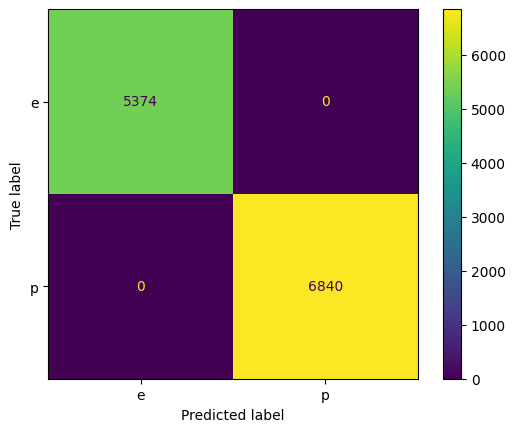

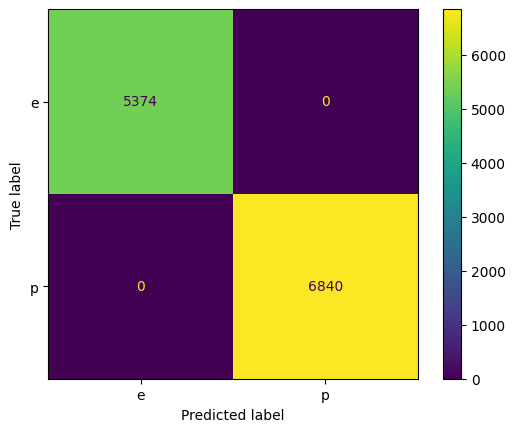

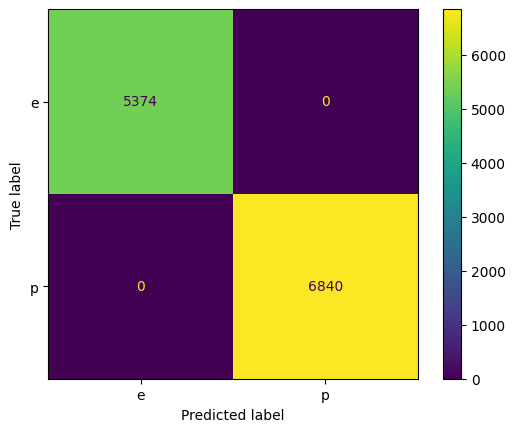

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

classifiers_selected = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'K-NN with k=1': KNeighborsClassifier(n_neighbors=1),
    'K-NN with k=3': KNeighborsClassifier(n_neighbors=3),
}
for name, clf in classifiers_selected.items():
    # fitting the model to the training data.
    clf.fit(X_train, y_train)

    # predict the test data.
    predictions = clf.predict(X_test)
    ConfusionMatrixDisplay.from_predictions(y_test, predictions)



## Show confusion matrix for SVM

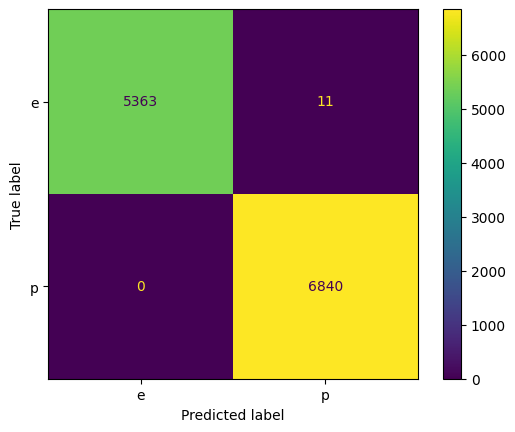

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
model_svm = SVC(kernel='poly', C=0.1, gamma=1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_pred = model_svm.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred)
# False Positive: 11 (not important)

# 5.  Hyperparameter Tuning:

## 5.1.1 Use GridSearchCV to find the best value of kernel, gamma, and C for SVM
- Split the dataset into 60% training, 20% validation, and 20% testing

In [ ]:
# Split the preprocessed feature data (X_prepared) and the target labels (y) into two sets:
# a training set and a combined validation/test set. The training set will contain 60% of the data,
# and the combined validation/test set will contain the remaining 40%. The 'random_state' ensures
# that the split is reproducible, so you get the same split each time you run the code.
X_train, X_validation_test, y_train, y_validation_test = train_test_split(X_prepared, y, test_size=0.4, random_state=42)

# Further split the combined validation/test set equally into validation and test sets.
# This means the validation and test sets will each contain 20% of the original data.
# Again, 'random_state' is set to ensure reproducibility.
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)

print(X_train.shape, y_train.shape, X_validation.shape, y_validation.shape, X_test.shape, y_test.shape)

(36641, 92) (36641,) (12214, 92) (12214,) (12214, 92) (12214,)


## 5.1.2 Pass the hyperparameters for the GridSearchCV to find the best ones

In [ ]:
# Import function
from sklearn.model_selection import GridSearchCV

# Parameters are used for comparison
svm_parameters={'kernel': ['poly'],
                'C': [0.01, 0.1, 1, 10],
                'gamma': [0.01, 0.1, 1, 10]
               }
# GridSearching this is gonna take forever, reduced the kernels

# Create Support Vector Classification for all models to be tested
svm = SVC()
svm_gs = GridSearchCV(estimator=svm, param_grid=svm_parameters)
svm_gs.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

# Select best estimator based on score and display score
svm_winner=svm_gs.best_estimator_
svm_winner.score(X_validation, y_validation)


0.9986900278369084

In [ ]:
# Check the svm winner parameters using svm_winner
svm_winner

SVC(C=0.01, gamma=10, kernel='poly')

## Re-evaluation for the SVM after hyperparameter tuning

The accuracy of SVM on the test set is: 99.959063%
Classification Error Rate for SVM: 0.000164


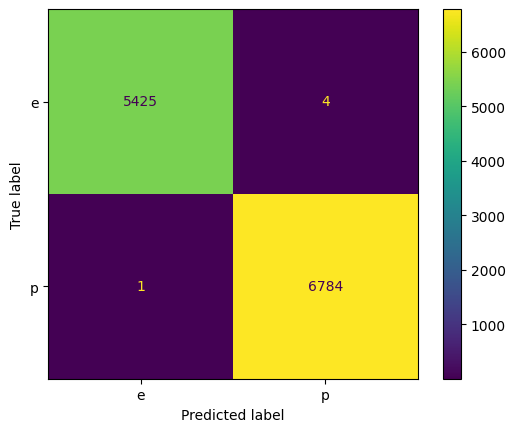

In [ ]:
model_svm = SVC(kernel='poly', C=10, gamma=0.1)
model_svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
svm_pred_hyper = model_svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred_hyper)
print(f"The accuracy of SVM on the test set is: {svm_accuracy:%}") # Accuracy increased from 0.999099 to 0.999590

scores = cross_val_score(model_svm, X_train, y_train, cv=kf, scoring='accuracy')
error_rate_svm = 1 - scores.mean()
print(f"Classification Error Rate for SVM: {error_rate_svm:f}") # Classification Error Rate reduced from 0.000205 to 0.000164

ConfusionMatrixDisplay.from_predictions(y_test, svm_pred_hyper) # However, we got 1 FN, which is very dangerous!!!


## 5.2.1 Random Forest

In [ ]:
rf_parameters = {
    'n_estimators': [100, 200, 500],
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())

print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Random Forest: {'n_estimators': 200}
Best score for Random Forest: 0.9996


## Re-evaluation for the Random Forest after hyperparameter tuning

The Random Forset with hyperparameter tuning accuracy: 1.0


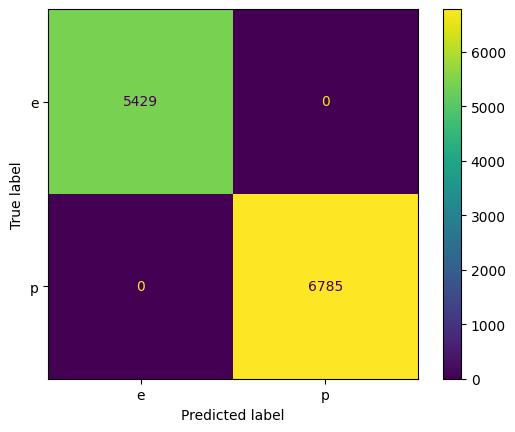

In [ ]:
rf_hyper = RandomForestClassifier(n_estimators=200, random_state=42)

# Same steps for testing accuracy
rf_hyper.fit(X_train, y_train)
predictions_rf_hyper = rf_hyper.predict(X_test)
accuracy = accuracy_score(y_test, predictions_rf_hyper)
print(f"The Random Forset with hyperparameter tuning accuracy: {accuracy}")

ConfusionMatrixDisplay.from_predictions(y_test, predictions_rf_hyper)

## 5.2.2 KNN

## We have already use different k values for KNN, and found out the best k value is 1.
- The accuracies of K=1 and K=3 are the same
- The confusion matrixes are the same
- The K=1 has lower classification error rate than K=3, so K=1 is better.

## Three graphs for KNN

1. Confusion Matrix already exist

2. ROC Curve

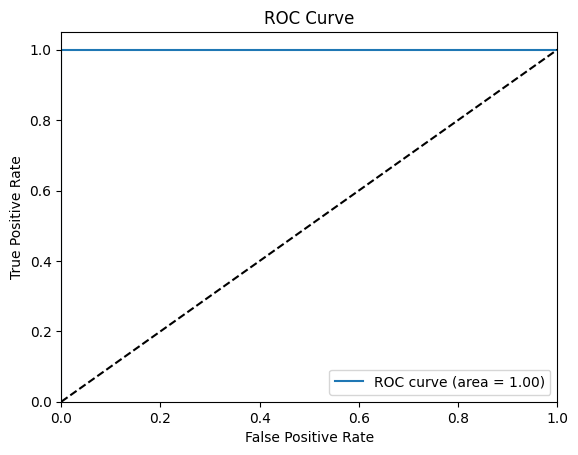

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Encode class values as integers
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Now you can fit the KNN and compute the ROC curve
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train_encoded)
predictions = knn.predict(X_test)

fpr, tpr, _ = roc_curve(y_test_encoded, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Classification Error Rate for K=1: 0.000082
Classification Error Rate for K=2: 0.000143
Classification Error Rate for K=3: 0.000164
Classification Error Rate for K=4: 0.000123


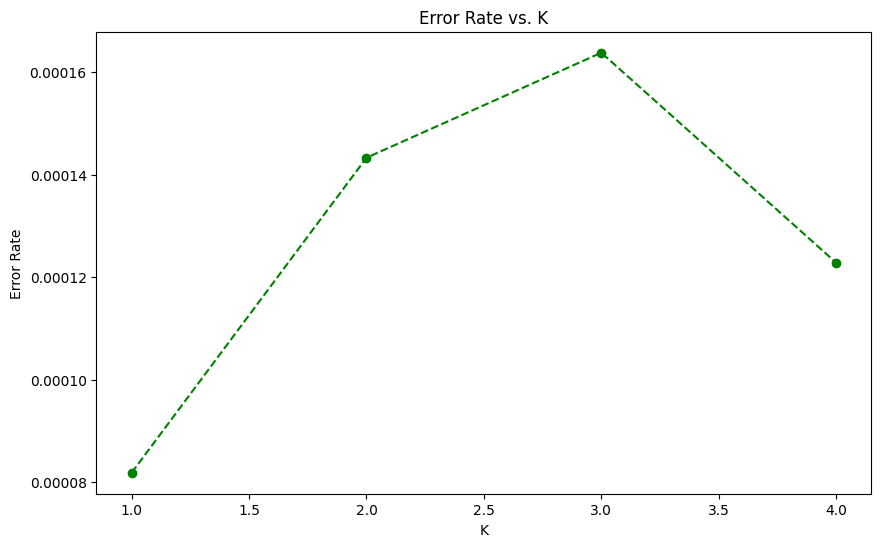

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Set up KFold cross-validation object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize error_rate list to store error rates for different values of K
error_rate = []

# Iterate over values of K from 1 to 4 for KNN
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)

    # Calculate cross-validation scores with 'accuracy' as the scoring metric
    scores = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy')

    # Calculate the mean classification error rate (the complement of accuracy)
    mean_error = 1 - scores.mean()
    error_rate.append(mean_error)
    print(f"Classification Error Rate for K={i}: {mean_error:f}")

# Plotting the error rate vs K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 5), error_rate, color="green", linestyle="dashed", marker="o")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.title("Error Rate vs. K")
plt.show()
